In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv('input/HospitalCosts.csv')

In [3]:
df.head()

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754




Task1 - To record the patient statistics, the agency wants to find the age category of people who frequent the hospital and has the maximum expenditure.

Task2 - In order of severity of the diagnosis and treatments and to find out the expensive treatments, the agency wants to find the diagnosis related group that has maximum hospitalization and expenditure.

Task3 - To make sure that there is no malpractice, the agency needs to analyze if the race of the patient is related to the hospitalization costs.

Task4 - To properly utilize the costs, the agency has to analyze the severity of the hospital costs by age and gender for proper allocation of resources.

Task5 - Since the length of stay is the crucial factor for inpatients, the agency wants to find if the length of stay can be predicted from age, gender, and race.

Task6 - To perform a complete analysis, the agency wants to find the variable that mainly affects the hospital costs



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     500 non-null    int64  
 1   FEMALE  500 non-null    int64  
 2   LOS     500 non-null    int64  
 3   RACE    499 non-null    float64
 4   TOTCHG  500 non-null    int64  
 5   APRDRG  500 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 23.6 KB


In [5]:
df.describe()[['AGE', 'LOS', 'TOTCHG']]

,AGE,LOS,TOTCHG
count,500.000000,500.000000,500.000000
mean,5.086000,2.828000,2774.388000
std,6.949474,3.363487,3888.407367
min,0.000000,0.000000,532.000000
25%,0.000000,2.000000,1216.250000
50%,0.000000,2.000000,1536.500000
75%,13.000000,3.000000,2530.250000
max,17.000000,41.000000,48388.000000


In [6]:
df['MDCOST'] = df['TOTCHG'] / df['LOS']

In [7]:
df.head()

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG,MDCOST
0,17,1,2,1.0,2660,560,1330.000000
1,17,0,2,1.0,1689,753,844.500000
2,17,1,7,1.0,20060,930,2865.714286
3,17,1,1,1.0,736,758,736.000000
4,17,1,1,1.0,1194,754,1194.000000


In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 499
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     499 non-null    int64  
 1   FEMALE  499 non-null    int64  
 2   LOS     499 non-null    int64  
 3   RACE    499 non-null    float64
 4   TOTCHG  499 non-null    int64  
 5   APRDRG  499 non-null    int64  
 6   MDCOST  499 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 31.2 KB


To record the patient statistics, the agency wants to find the age category of people who frequent the hospital and has the maximum expenditure

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='AGE', ylabel='TOTCHG'>

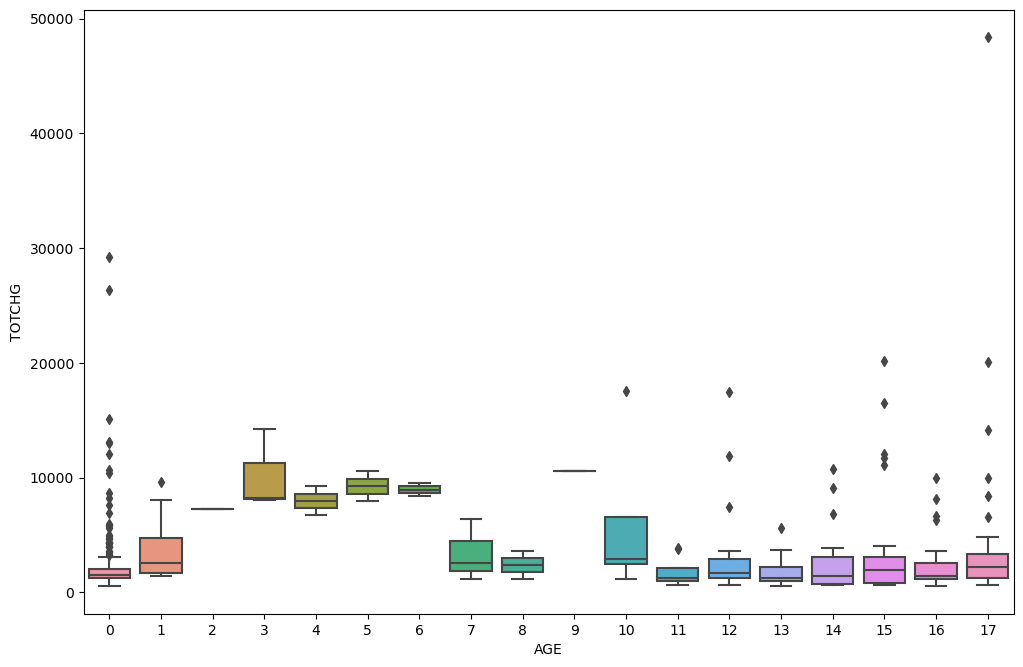

In [11]:
plt.figure(figsize=(12,8),dpi=100)
sns.boxplot(data=df, x='AGE', y='TOTCHG')

In [12]:
df.groupby(['AGE']).mean()['TOTCHG'].sort_values(ascending=False)

AGE
9     10573.500000
3     10183.333333
5      9253.500000
6      8964.000000
4      7996.000000
2      7298.000000
10     6117.250000
17     4599.394737
15     3853.344828
1      3774.400000
12     3660.800000
7      3362.333333
14     2585.720000
16     2384.448276
8      2370.500000
0      2212.294118
11     1781.250000
13     1729.722222
Name: TOTCHG, dtype: float64

<AxesSubplot:xlabel='AGE', ylabel='TOTCHG'>

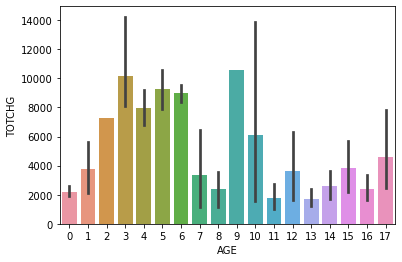

In [13]:
sns.barplot(data=df, x='AGE', y='TOTCHG')

We can see that the group between 3 and 6 years old has the major expanditure. Not considering the outliers.

In order of severity of the diagnosis and treatments and to find out the expensive treatments, the agency wants to find the diagnosis related group that has maximum hospitalization and expenditure

In [14]:
df['APRDRG'].unique()

array([560, 753, 930, 758, 754, 347, 751, 812, 566, 249, 422,  50, 139,
       141, 420,  97, 811, 755, 720,  53, 760, 710, 776, 115, 602, 138,
       137, 640, 639, 143, 254, 581, 633, 626, 636,  23,  57, 421, 580,
       750,  49,  51, 313, 614, 634, 952,  21,  92, 756, 317, 344, 114,
       206, 723, 911,  54, 225,  58, 740, 308, 204, 561, 863])

In [15]:
df['APRDRG'].value_counts()

640    266
754     37
753     36
758     20
751     14
      ... 
710      1
776      1
254      1
143      1
863      1
Name: APRDRG, Length: 63, dtype: int64

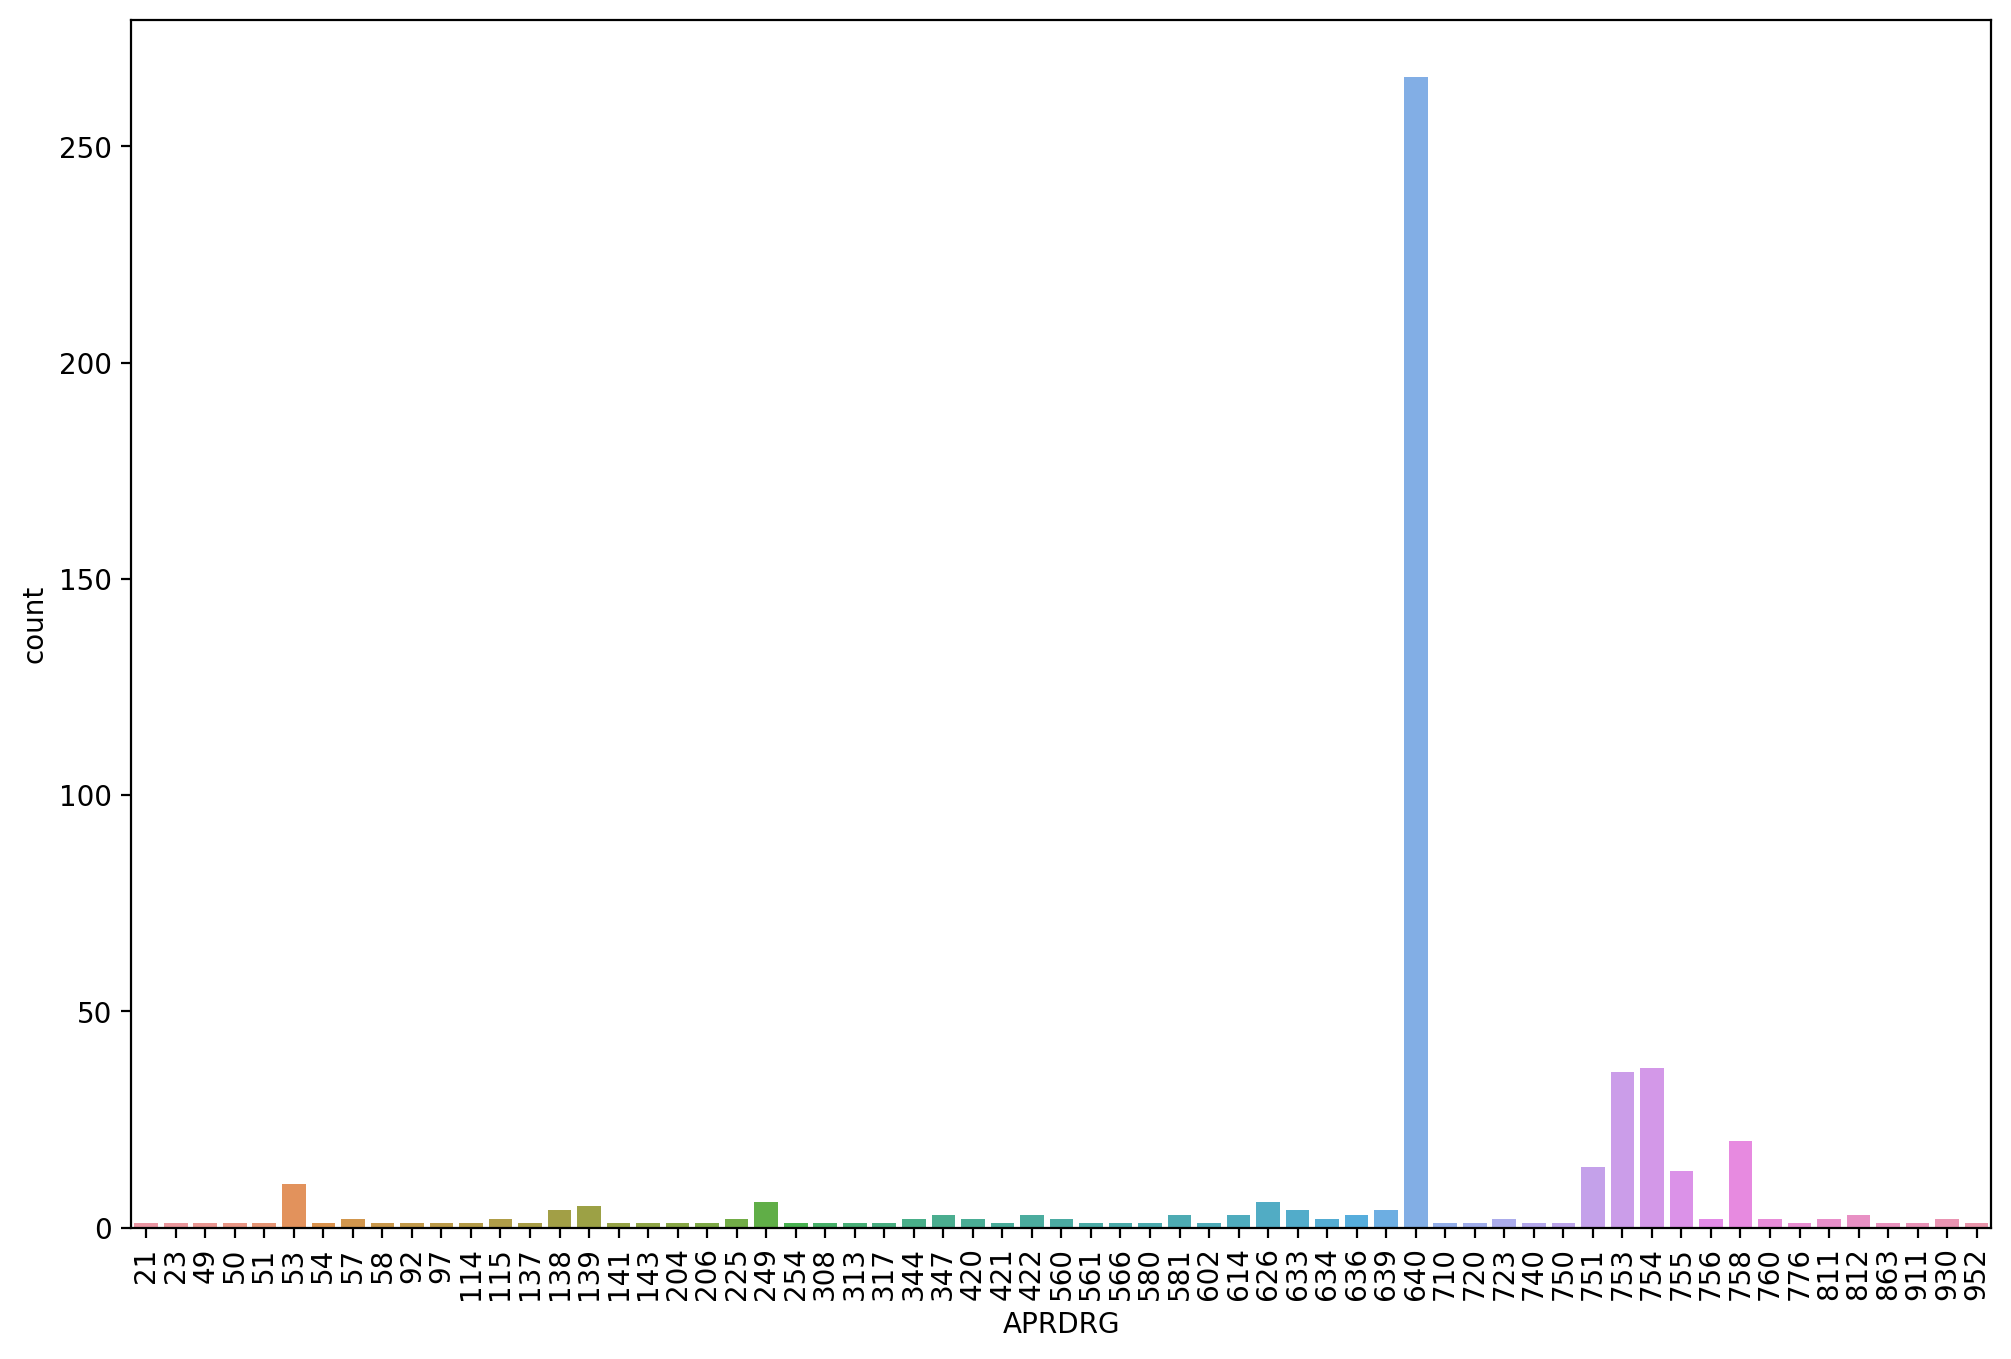

In [16]:
plt.figure(figsize=(12,8),dpi=200)
plt.xticks(rotation=90)
sns.countplot(data=df, x='APRDRG');

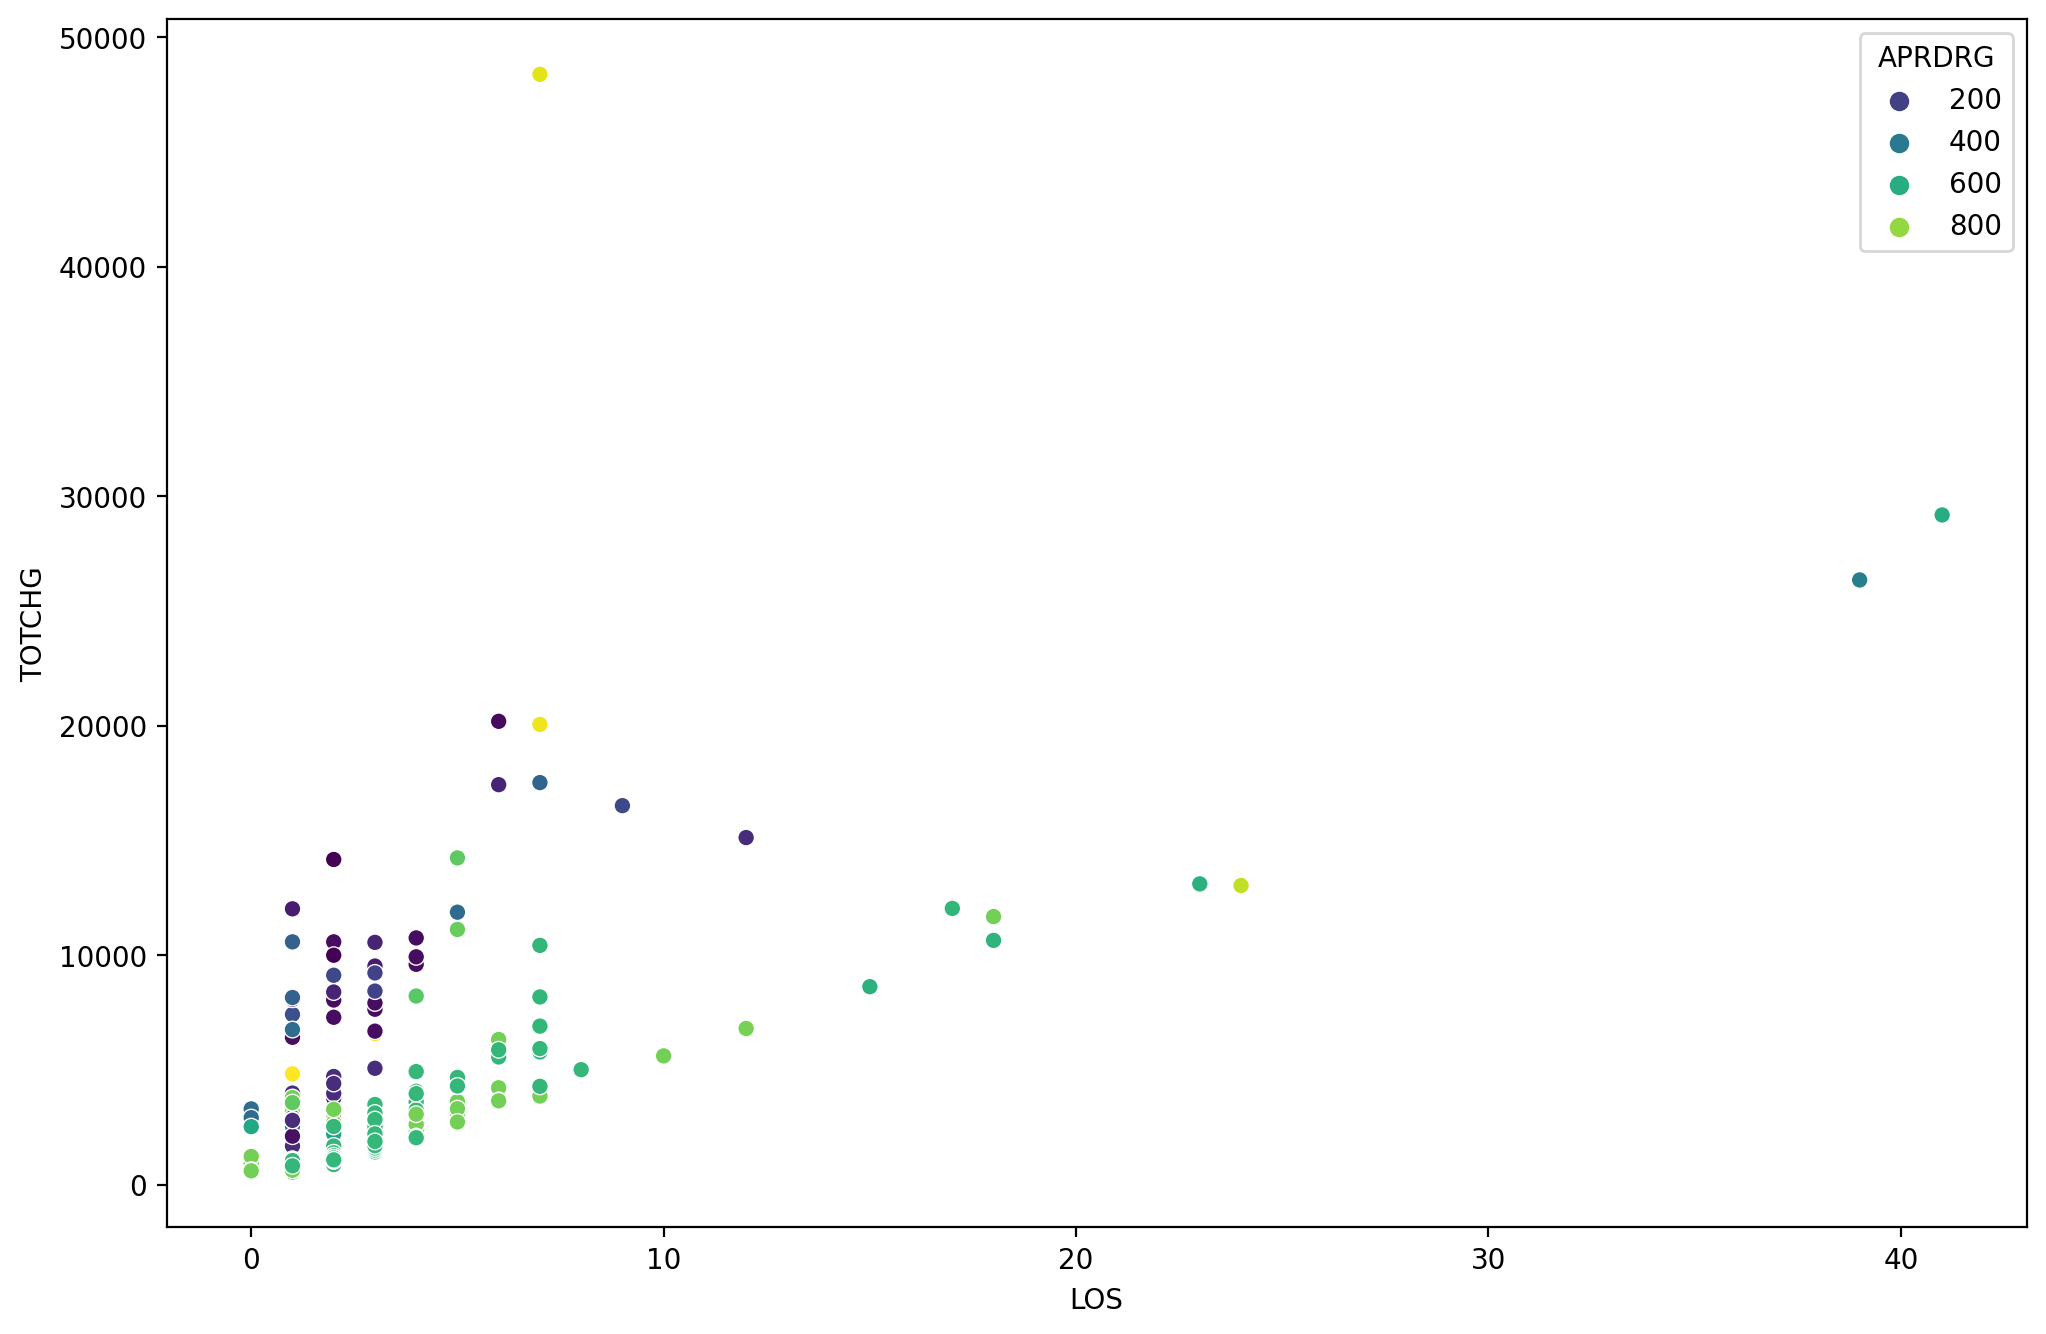

In [17]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df, x='LOS', y='TOTCHG', hue='APRDRG', palette='viridis');

In [18]:
df.groupby(['APRDRG']).mean()['TOTCHG'].sort_values(ascending=False)

APRDRG
911    48388.000000
602    29188.000000
421    26356.000000
49     20195.000000
317    17524.000000
           ...     
776     1193.000000
755      859.076923
54       851.000000
756      747.000000
254      615.000000
Name: TOTCHG, Length: 63, dtype: float64

In [19]:
df.groupby(['APRDRG']).mean()['LOS'].sort_values(ascending=False)

APRDRG
602    41.000000
421    39.000000
863    24.000000
614    15.000000
137    12.000000
         ...    
313     1.000000
811     0.500000
347     0.333333
581     0.333333
254     0.000000
Name: LOS, Length: 63, dtype: float64

In [20]:
df['TOTCOST'] = df['APRDRG'] * df['LOS']

In [21]:
df.head()

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG,MDCOST,TOTCOST
0,17,1,2,1.0,2660,560,1330.000000,1120
1,17,0,2,1.0,1689,753,844.500000,1506
2,17,1,7,1.0,20060,930,2865.714286,6510
3,17,1,1,1.0,736,758,736.000000,758
4,17,1,1,1.0,1194,754,1194.000000,754


In [22]:
df.sort_values('TOTCOST', ascending=False)

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG,MDCOST,TOTCOST
71,0,1,41,1.0,29188,602,711.902439,24682
463,0,1,24,1.0,13040,863,543.333333,20712
168,0,0,39,1.0,26356,421,675.794872,16419
372,0,1,23,1.0,13112,614,570.086957,14122
330,15,0,18,1.0,11685,753,649.166667,13554
...,...,...,...,...,...,...,...,...
40,7,0,0,1.0,2530,347,inf,0
210,0,1,0,1.0,2847,581,inf,0
57,15,1,0,1.0,607,754,inf,0
187,16,1,0,1.0,622,754,inf,0


Despite the 911 treatment group has the high expanditure and 640 the high hospitalization, the 602 group has the high value of combined expanditure and hospitalization.

To make sure that there is no malpractice, the agency needs to analyze if the race of the patient is related to the hospitalization costs

In [23]:
df.groupby(['RACE']).mean()['TOTCHG'].sort_values(ascending=False)

RACE
2.0    4202.166667
3.0    3041.000000
1.0    2772.669421
4.0    2344.666667
5.0    2026.666667
6.0    1349.000000
Name: TOTCHG, dtype: float64

<AxesSubplot:xlabel='RACE', ylabel='TOTCHG'>

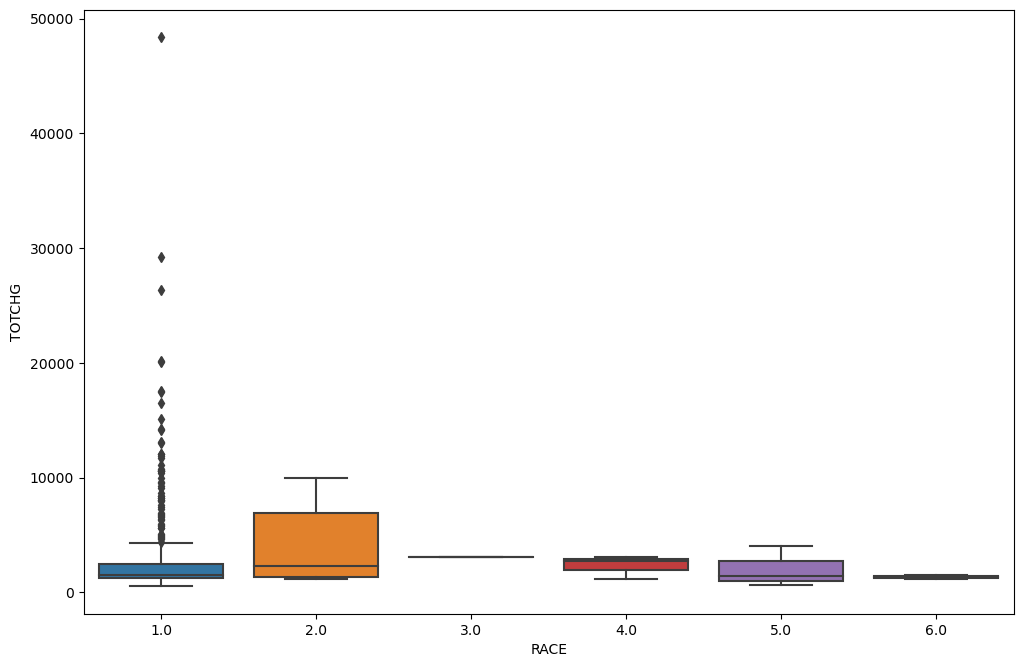

In [24]:
plt.figure(figsize=(12,8),dpi=100)
sns.boxplot(data=df, x='RACE', y='TOTCHG')

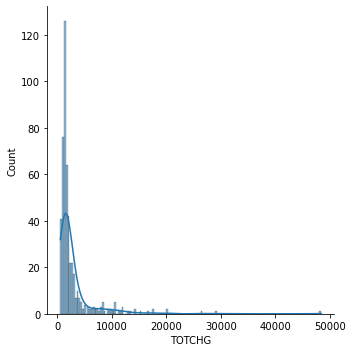

In [25]:
sns.displot(data=df, x='TOTCHG', kde=True)

In [26]:
df['TOTCHG'].describe()

count      499.000000
mean      2777.631263
std       3891.632405
min        532.000000
25%       1218.500000
50%       1538.000000
75%       2530.500000
max      48388.000000
Name: TOTCHG, dtype: float64

In [27]:
df.groupby(['RACE']).describe()['TOTCHG']

/Users/prathamrastogi/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:3963: RuntimeWarning: invalid value encountered in multiply
  lerp_interpolation = asanyarray(add(a, diff_b_a*t, out=out))
/Users/prathamrastogi/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:3964: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t>=0.5)


,count,mean,std,min,25%,50%,75%,max
RACE,,,,,,,,
1.0,484.0,2772.669421,3924.567512,532.0,1219.25,1538.0,2483.75,48388.0
2.0,6.0,4202.166667,3884.810905,1153.0,1351.75,2304.0,6887.75,10002.0
3.0,1.0,3041.000000,NaN,3041.0,3041.00,3041.0,3041.00,3041.0
4.0,3.0,2344.666667,1033.354892,1173.0,1954.00,2735.0,2930.50,3126.0
5.0,3.0,2026.666667,1813.522080,615.0,1004.00,1393.0,2732.50,4072.0
6.0,2.0,1349.000000,263.043723,1163.0,1256.00,1349.0,1442.00,1535.0


In [28]:
def detecta_outlier(x, limite = 1.5):
    dq = np.percentile(x, 75) - np.percentile(x, 25)
    limite_inf = np.maximum(np.percentile(x, 25) - limite * dq, np.min(x))
    limite_sup = np.minimum(np.percentile(x, 75) + limite * dq, np.max(x))
    print("Limite inferior:", limite_inf)
    print("Limite superior:", limite_sup)
    return np.where((x < limite_inf) | (x > limite_sup), 1, 0)

In [29]:
outliers = detecta_outlier(df.TOTCHG)

Limite inferior: 532.0
Limite superior: 4498.5


Despite the race 2 mean to be below the superior limit, it shoud be investigate because the value of the mean TOTCHG for this group is much higher than others

To properly utilize the costs, the agency has to analyze the severity of the hospital costs by age and gender for proper allocation of resources

<AxesSubplot:xlabel='FEMALE', ylabel='TOTCHG'>

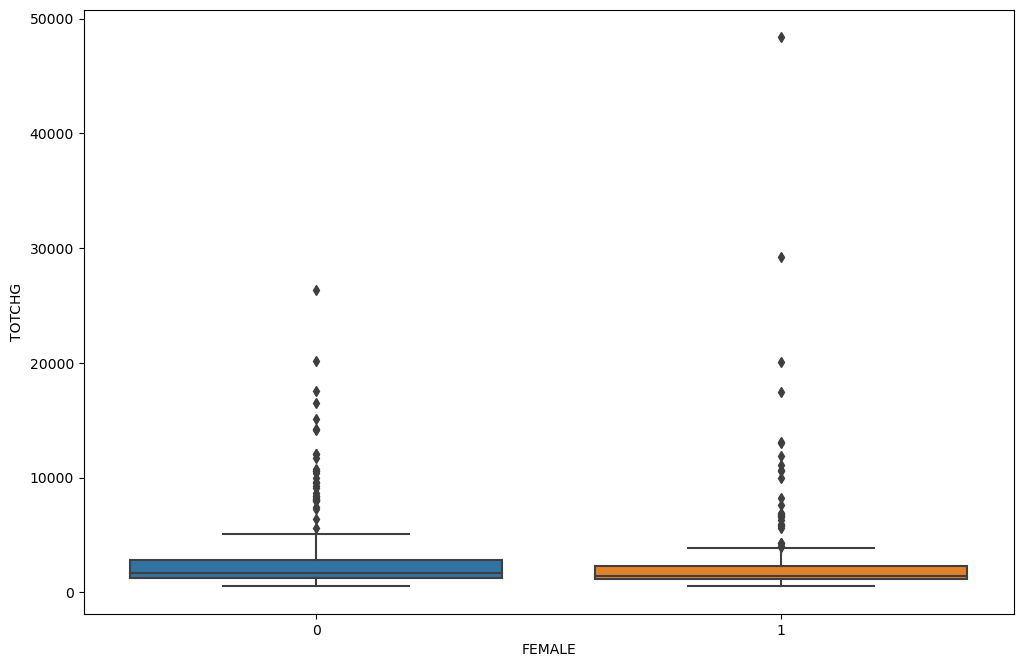

In [30]:
plt.figure(figsize=(12,8),dpi=100)
sns.boxplot(data=df, x='FEMALE', y='TOTCHG')

In [31]:
df.groupby(['FEMALE']).mean()['TOTCHG']

FEMALE
0    3013.897541
1    2551.556863
Name: TOTCHG, dtype: float64

<AxesSubplot:xlabel='AGE', ylabel='TOTCHG'>

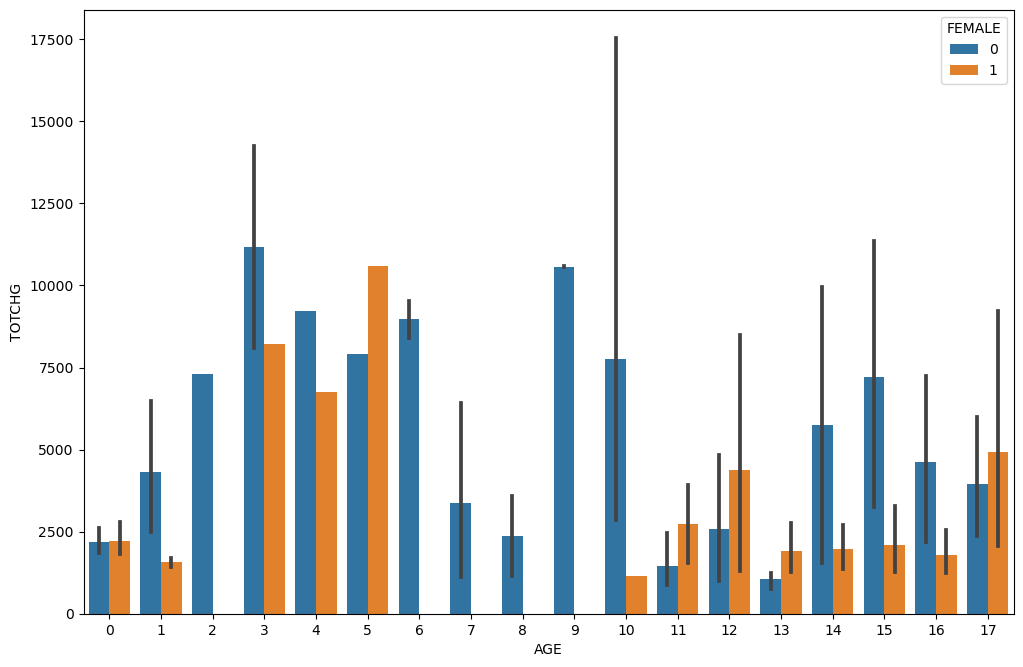

In [32]:
plt.figure(figsize=(12,8),dpi=100)
sns.barplot(data=df, x='AGE', y='TOTCHG', hue='FEMALE')

<AxesSubplot:xlabel='AGE', ylabel='count'>

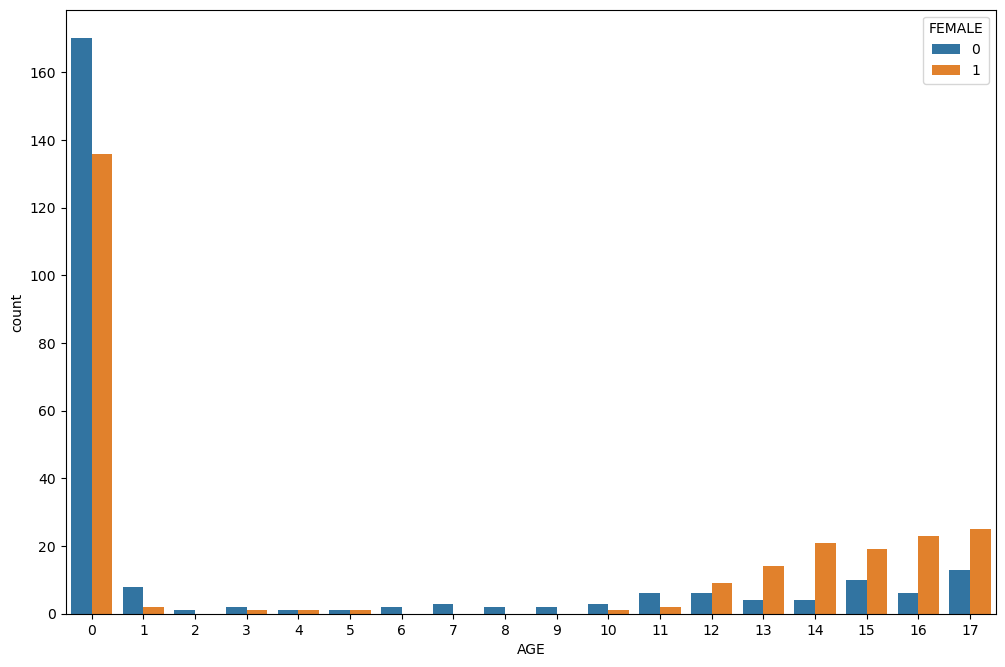

In [33]:
plt.figure(figsize=(12,8),dpi=100)
sns.countplot(data=df, x='AGE',hue='FEMALE')

It's possible to see that over the age of 12 the number of female patients is higher than male. There is a lack of female patients between the age of 6 and 9.

The costs with male is biger than with female, on almost all the ages, except by the ages of 5, 11 to 13 and over 17

Since the length of stay is the crucial factor for inpatients, the agency wants to find if the length of stay can be predicted from age, gender, and race

<AxesSubplot:xlabel='AGE', ylabel='LOS'>

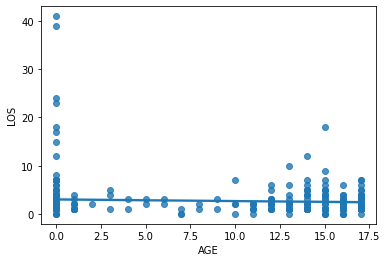

In [35]:
sns.regplot(data=df, x='AGE', y='LOS')

<AxesSubplot:xlabel='FEMALE', ylabel='LOS'>

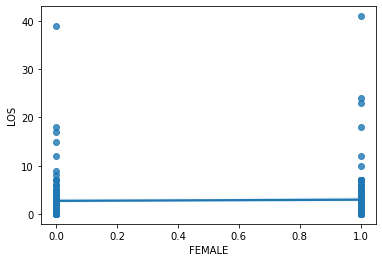

In [36]:
sns.regplot(data=df, x='FEMALE', y='LOS')

<AxesSubplot:xlabel='RACE', ylabel='LOS'>

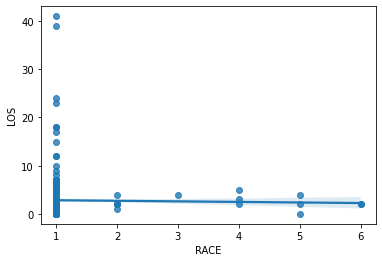

In [37]:
sns.regplot(data=df, x='RACE', y='LOS')

The regression line is almost parallel to x axis, so there is no correlations between the independt variables and the dependent variable

To perform a complete analysis, the agency wants to find the variable that mainly affects the hospital costs

<AxesSubplot:xlabel='LOS', ylabel='TOTCHG'>

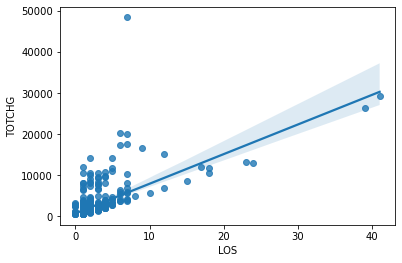

In [38]:
sns.regplot(data=df, x='LOS', y='TOTCHG')

<AxesSubplot:xlabel='APRDRG', ylabel='TOTCHG'>

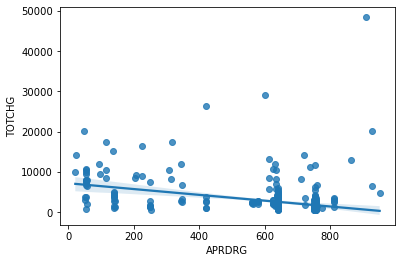

In [39]:
sns.regplot(data=df, x='APRDRG', y='TOTCHG')

<AxesSubplot:xlabel='AGE', ylabel='TOTCHG'>

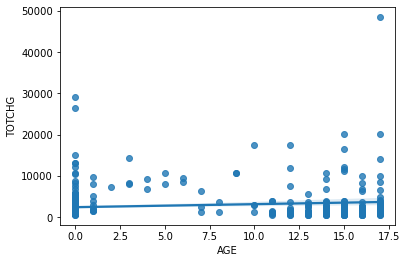

In [40]:
sns.regplot(data=df, x='AGE', y='TOTCHG')

<AxesSubplot:xlabel='RACE', ylabel='TOTCHG'>

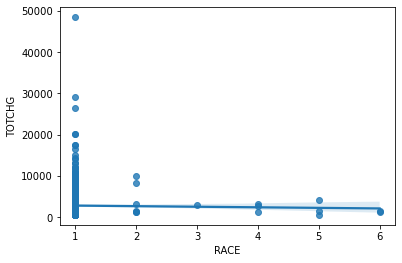

In [41]:
sns.regplot(data=df, x='RACE', y='TOTCHG')

The LOS variable has the highest positive correlation, so it is the variable that more affect the cost